<a href="https://colab.research.google.com/github/yee23456/AI_problem_analysis/blob/main/%E4%BD%9C%E6%A5%AD%E4%BA%8C_%E6%B2%88%E7%9D%BF%E6%9C%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)

In [2]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2022-03-30 15:19:12--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.203.113, 74.125.203.139, 74.125.203.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5igtu69eturp55rm52jr7d7nn2gj4r4u/1648653525000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-03-30 15:19:12--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5igtu69eturp55rm52jr7d7nn2gj4r4u/1648653525000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.125.204.132

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/大學/大數據資料/高齡獨居化計畫.csv')
df_towm_id = pd.read_excel('/content/drive/MyDrive/大學/大數據資料/鄉鎮市區.xlsx')
df_towm_id = df_towm_id.drop(['鄉鎮市區代碼'],axis = 1)
data = data.merge(df_towm_id, left_on=('addr_city_cd'), right_on=('戶籍鄉鎮市區'))

city_A_no = pd.DataFrame(data.groupby('縣市').sum()['Total_older'] / data.groupby('縣市').sum()['total_city_people'],columns=['older_precent'])
city_A_no['older_lonely_precent'] = data.groupby('縣市').sum()['total_old_and_lonely'] / data.groupby('縣市').sum()['total_city_people']
data = data.merge(city_A_no, left_on=('縣市'), right_on=('縣市'))

df = pd.read_excel('/content/drive/MyDrive/大學/大數據資料/經濟指標資料1.xlsx')
df = df.drop(['Unnamed: 0'],axis = 1)
data = data.merge(df, left_on=('TOWNNAME'), right_on=('TOWNNAME'))

dx = pd.read_excel('/content/drive/MyDrive/大學/大數據資料/經濟指標資料2.xlsx')
dx = dx.drop(['Unnamed: 0','TOWNID','TOWNCODE','COUNTYNAME','TOWNENG','COUNTYID','COUNTYCODE'],axis = 1)
data = pd.merge( data, dx , on='TOWNNAME')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   addr_city_cd                        488 non-null    int64  
 1   Total_older                         488 non-null    int64  
 2   total_15-65_old                     488 non-null    int64  
 3   total_old_and_lonely                488 non-null    int64  
 4   total_lonely                        488 non-null    int64  
 5   total_disability                    488 non-null    int64  
 6   total_old_and_disability            488 non-null    int64  
 7   total_have_children                 488 non-null    int64  
 8   total_old_and_have_child            488 non-null    int64  
 9   total_child_is_same_county          488 non-null    int64  
 10  total_old_and_child_is_same_county  488 non-null    int64  
 11  total_mate                          488 non-n

#第一題

# 新增區段

In [ ]:
city_data_older = data.groupby('COUNTYNAME').mean().sort_values('older_precent')[::-1]
city_list_older = city_data_older.index.tolist()
city_older = pd.DataFrame(city_data_older,city_list_older)
# city_older[['older_precent','單價元坪']]

In [ ]:
# def colors(data_len):
#   colors = cm.RdYlGn(np.linspace(0,1,len(data_len)))
#   return colors
def first_6(data_name,n):
  axes = data_name[n][:6].plot.bar(rot = 0 ,color = 'lightsalmon')
  return Drow_P(axes)

def city_6(data_name,n,p):
  axes = data_name[n].iloc[p].plot.bar(rot = 0 ,color = 'lightsalmon')
  return Drow_P(axes)
  
def Drow_P(x):
  for label in x.get_xticklabels():
    label.set_fontproperties(myfont)
  plt.legend(prop=myfont)

## 商店

In [ ]:
y = ['消防隊數量','工廠數量','診所數量','金融機構','超商超市市場','餐飲','加油站數量']
# first_6(city_older,y)

In [ ]:
# city_6(city_older,y,[2,12,13,15,17,-2])

## 實價登差異

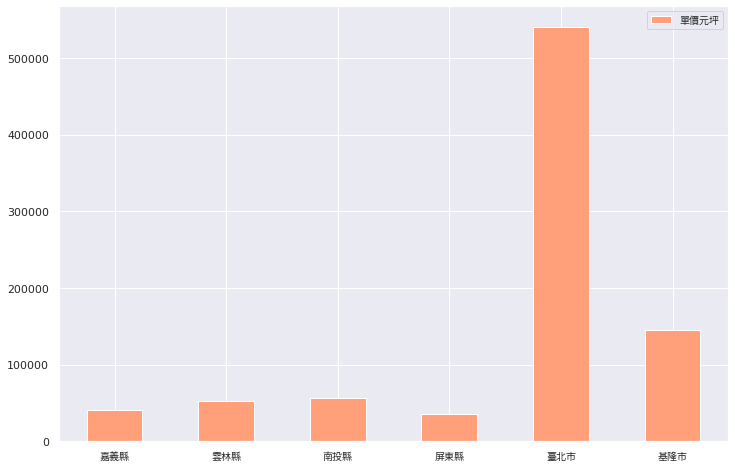

In [ ]:
# X軸 高齡化高到低
# Y軸 單價元坪

first_6(city_older,'單價元坪')

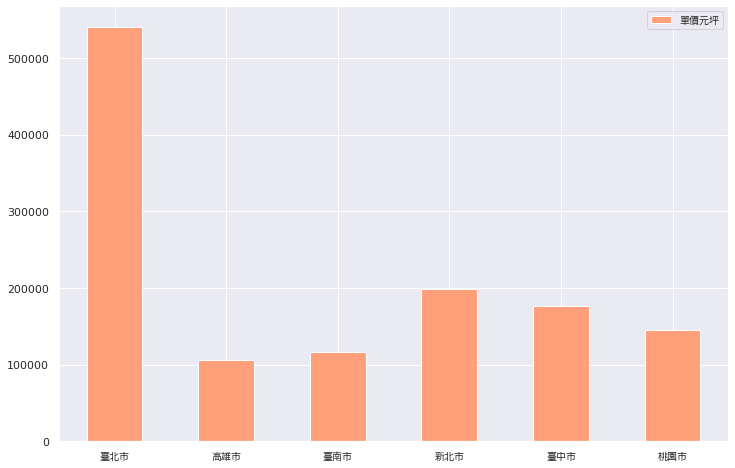

In [ ]:
# X軸 六都高齡化高到低
# Y軸 單價元坪
# 六都位置[2,12,13,15,17,-2]

city_6(city_older,'單價元坪',[4,12,13,14,-4,-2])

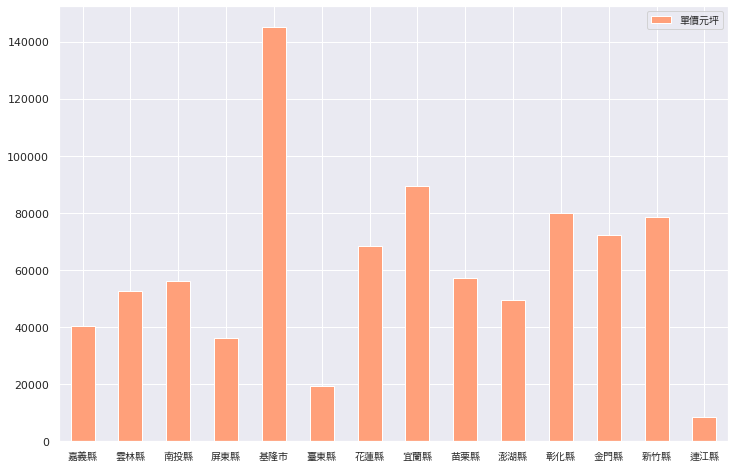

In [ ]:
#非六都
city_6(city_older,'單價元坪',[i for i in range(22) if i not in [4,12,13,14,15,16,18,20]])

## 所得差異

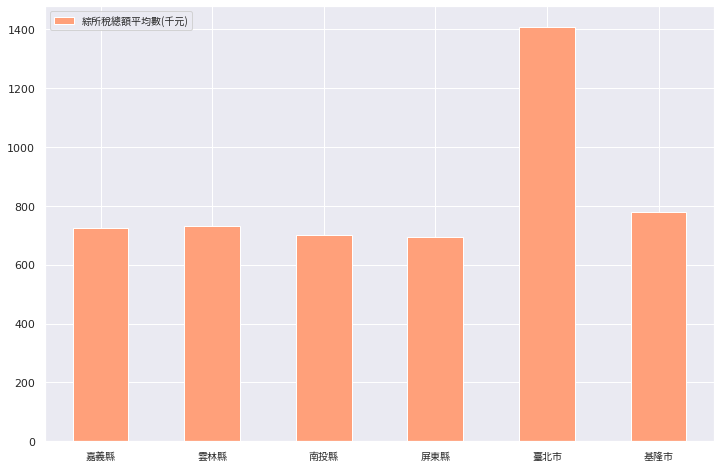

In [ ]:
# X軸 高齡化高到低
# Y軸 綜所稅總額平均數(千元)

first_6(city_older,'綜所稅總額平均數(千元)')

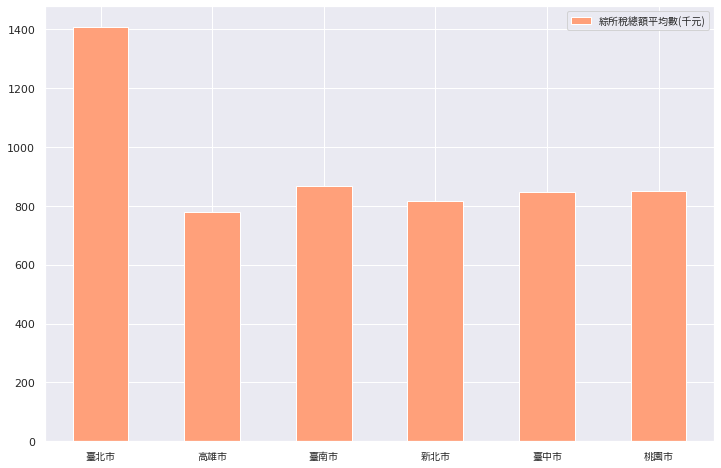

In [ ]:
# X軸 六都高齡化高到低
# Y軸 綜所稅總額平均數(千元)

city_6(city_older,'綜所稅總額平均數(千元)',[4,12,13,14,-4,-2])

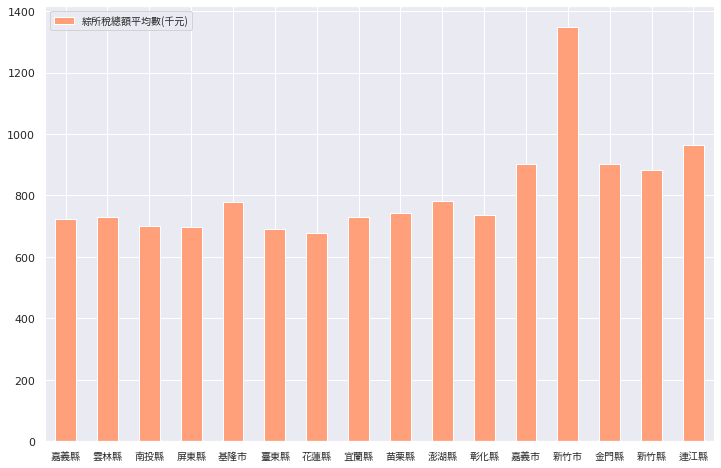

In [ ]:
#非六都
city_6(city_older,'綜所稅總額平均數(千元)',[i for i in range(22) if i not in [4,12,13,14,18,20]])

# 第二題

In [ ]:
city_D_OLP = data.groupby('COUNTYNAME').mean().sort_values('older_lonely_precent')[::-1]
city_L_OLP = city_D_OLP.index.tolist()
city_OLP = pd.DataFrame(city_D_OLP,city_L_OLP)
city_OLP[['older_lonely_precent','單價元坪']]

,older_lonely_precent,單價元坪
基隆市,0.043944,145037.091335
臺北市,0.042372,540362.873793
嘉義縣,0.042124,40515.268635
臺東縣,0.039632,19256.126033
雲林縣,0.039515,52672.485988
南投縣,0.039034,56304.079783
花蓮縣,0.038661,68278.284335
宜蘭縣,0.038306,89406.128332
高雄市,0.036407,106511.943164
澎湖縣,0.035237,49580.487843


## 商店


In [ ]:
# first_6(city_OLP,y)

In [ ]:
# city_6(city_OLP,y,[0,8,11,12,17,19])

## 實價登入差異


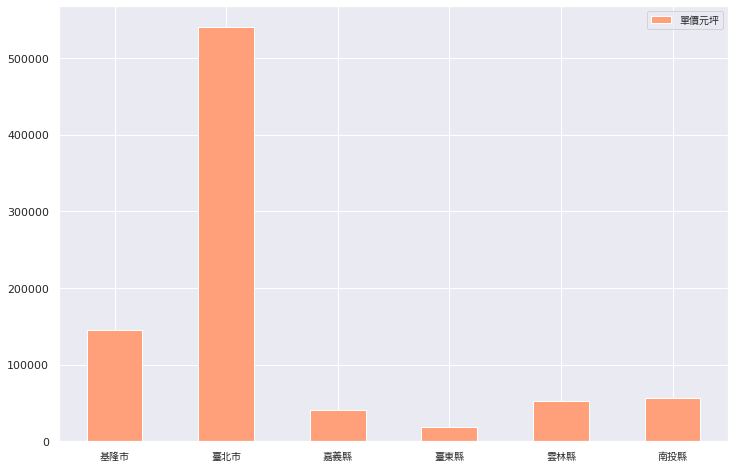

In [ ]:
# X軸 高齡獨居化高到低
# Y軸 單價元坪

first_6(city_OLP,'單價元坪')

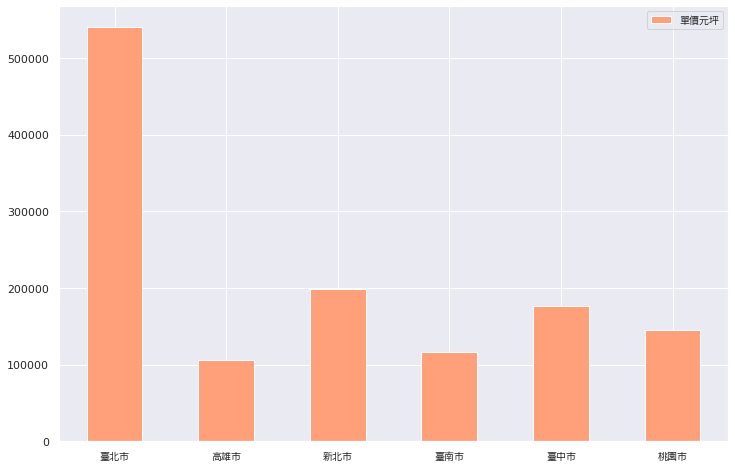

In [ ]:
# X軸 六都高齡獨居化高到低
# Y軸 單價元坪
# 六都位置[0,8,11,12,17,19]

city_6(city_OLP,'單價元坪',[1,8,10,13,16,18])

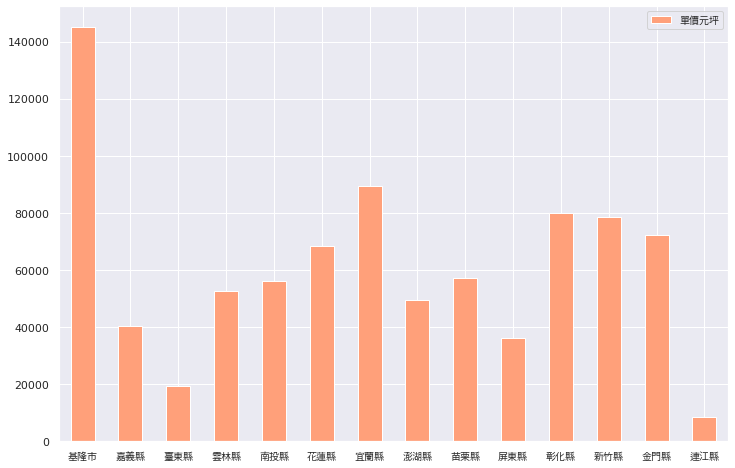

In [ ]:
#非六都
city_6(city_OLP,'單價元坪',[i for i in range(22) if i not in [1,8,10,13,14,15,16,18]])

## 所得差異

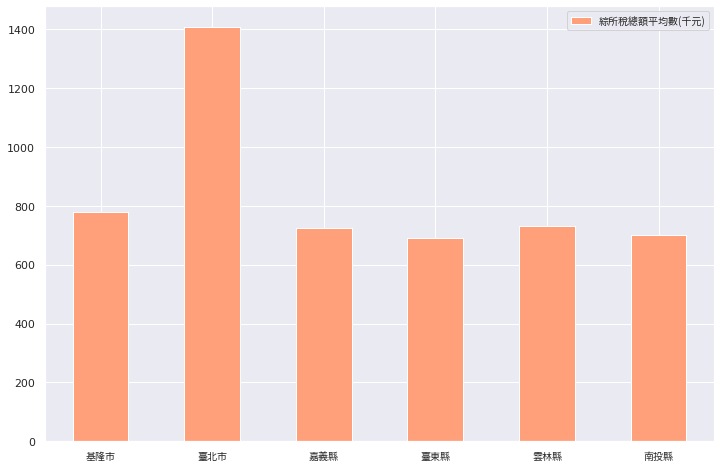

In [ ]:
# X軸 高齡獨居化高到低
# Y軸 綜所稅總額平均數(千元)

first_6(city_OLP,'綜所稅總額平均數(千元)')

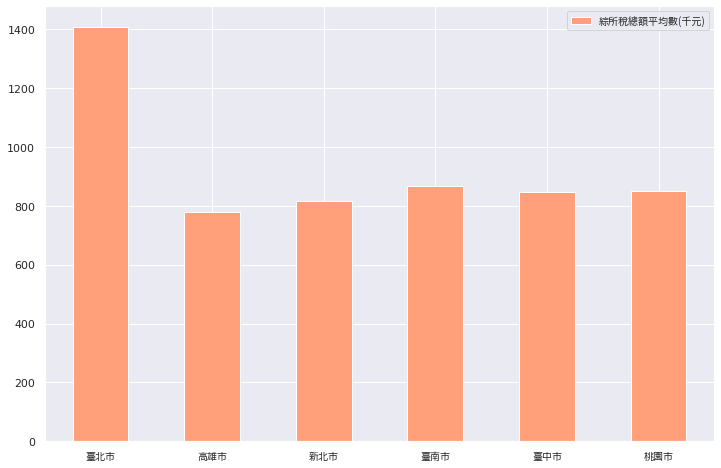

In [ ]:
# X軸 六都高齡獨居化高到低
# Y軸 綜所稅總額平均數(千元)

city_6(city_OLP,'綜所稅總額平均數(千元)',[1,8,10,13,16,18])

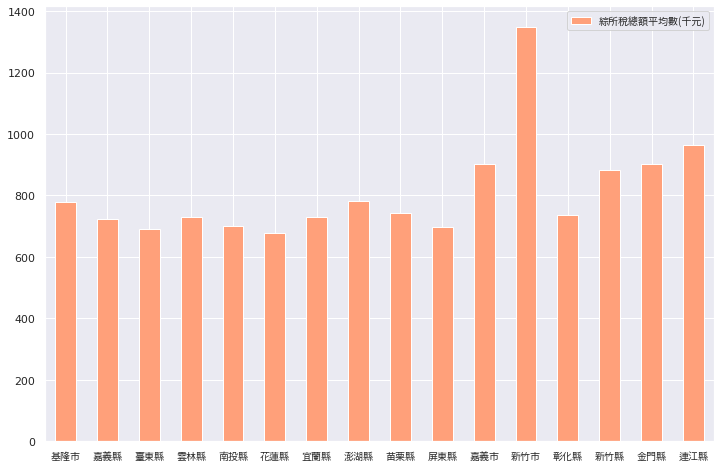

In [ ]:
#非六都
city_6(city_OLP,'綜所稅總額平均數(千元)',[i for i in range(22) if i not in [1,8,10,13,16,18]])

# 第三題

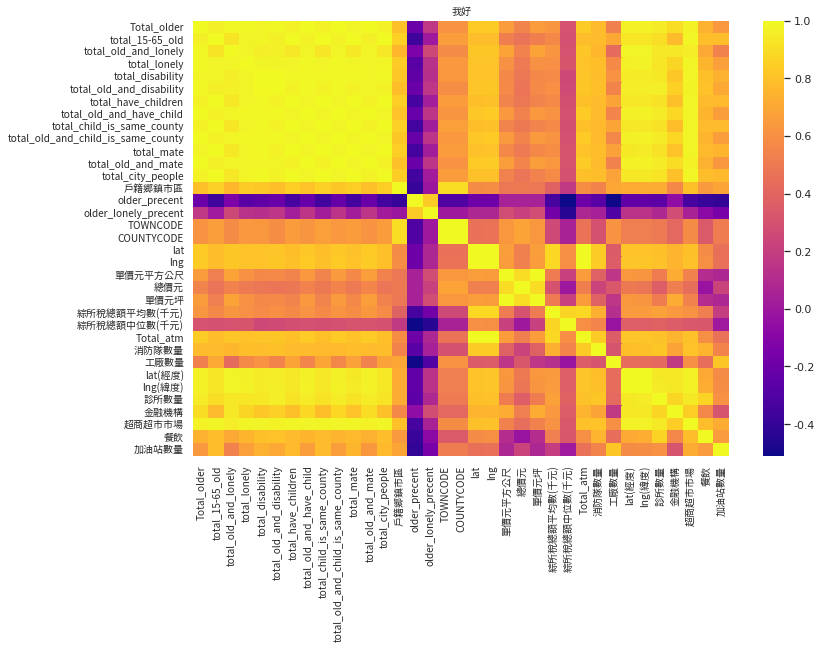

In [ ]:
sns.set(font=myfont.get_name())
plt.title('我好',fontproperties=myfont)
plt.xticks(fontproperties=myfont)
plt.yticks(fontproperties=myfont)
sns.heatmap(city_OLP.iloc[:,1:].corr(),annot=False,cmap='plasma')